In [94]:
# Import libraries
import cv2
import os
import glob
import sys

from IPython.display import display #display photos on Jupyter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imutils
import random

# Set the default color-map of plt.image() to 'gray'
plt.rc('image', cmap='gray') 
# set a bigger default figure size
plt.rc('figure', figsize=[20,20]) 

# Part 1: Load the data: 

1) Load the images - gray level

2) Scalling

3) Plot

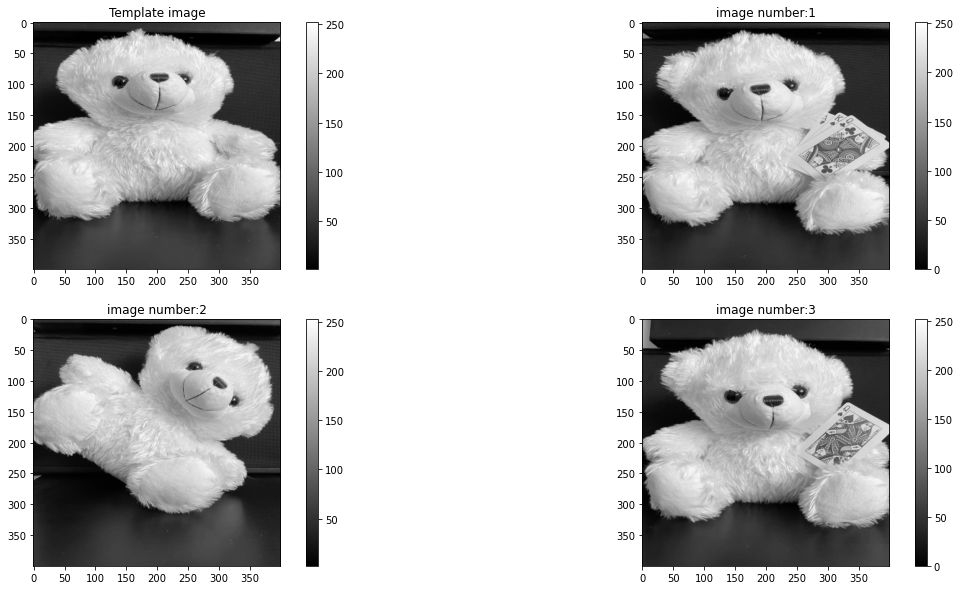

In [184]:
# Load the images

# Images files of 3 datasets

file_names1=["template_queen.JPG","noise_queen.JPG","king.JPG","queen2.JPG"]
file_names2=["As_template.JPG","as3.JPG","as2.JPG"]
file_names3=["mishka_template.JPG","mishka4.JPG"]


def loadRescaleImages(file_names):
    
    """
    List is passed as a parameter, the function returns list of images. 
    Each image is loaded and transferrd to gray scale.
    Note: The first image is the template image. 
    """
    # List contains the images
    instances = []
    
    # Load all images and keep it in 'instances', convert them to grayscale, and blur them slightly
    for file_name in file_names:
        img = cv2.imread(file_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        instances.append(img) 


    # Scaling the images to the same size 
    for i in range(len(instances)):
        instances[i] = cv2.resize(instances[i],(400,400), interpolation = cv2.INTER_AREA)
    return(instances)

def plotImages(instances, row, column):
     
    """
    List of images, row and column passed as parameters, the function plots images. 
    row and column represents the location of ploting each image. 
    """
    # Plot the images
    w = 10
    h = 10
    fig = plt.figure(figsize=(20, 10))
    columns = column
    rows = row
    # ax enables access to manipulate each of subplots
    ax = []
    for i in range(columns*rows):
        # Create subplot and append to ax
            ax.append(fig.add_subplot(rows, columns, i+1))
            plt.imshow(instances[i],cmap = 'gray')
            plt.colorbar()
            if (i==0):
                ax[-1].set_title("Template image")
            else:
                ax[-1].set_title("image number:"+str(i))  # Set title
    plt.show()  # Finally, render the plot


    

instances = loadRescaleImages(file_names)
template_img = instances[0]
plotImages(instances, 2,2)


# Part 2: Create images with variance

1) Create rotated images. 

2) Create defects over the template image.

3) Create noisy(Salt and pepper noise) images.


In [188]:
def rotateImage(image):
    
    """
    Image is passed as a parameter and retured as rotated image.
    """
    # Make a copy image called temp
    temp = image.copy()
    # Pick a random angle
    angle = random.randint(-360,360) 
    # Rotate temp according to the angle 
    rotated = imutils.rotate_bound(temp, angle)
    return(rotated)

def createBlackSquare(image):
    """
    Image is passed as a parameter and returned with a black square on  it at a specific location.
    """
    # Get the shape of the image
    rows,cols = image.shape
    # Locate few pixels in the photo and change them to 0 
    # The range of the pixels that changed to 0
    # In Dataset number 3 I changed the value to 255 instead of 0 to make the square white
    image[int(rows/2)-30:int(rows/2)+30,int(cols/2)-30:int(cols/2)+30]=0 
    return(image)


def createSaltAndPepperNoise(image):
    """
    Image is passed as a parameter and returned with Salt&Pepper noise.
    """
    # Getting the dimensions of the image
    rows , cols = image.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, rows - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, cols - 1)
         
        # Color that pixel to white
        image[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, rows - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, cols - 1)
         
        # Color that pixel to black
        image[y_coord][x_coord] = 0
    return image




In [189]:
# Create a list contains the original images
variance_instances = [template_img.copy(),instances[1].copy() ]

# Create variance images
img1 = rotateImage(template_img.copy())
img2 = createSaltAndPepperNoise(template_img.copy())
img3 = createBlackSquare(instances[3].copy())
img4 = rotateImage(img3.copy())
# img4 = instances[3].copy()

# Append the images to the list
variance_instances.append(img1)
variance_instances.append(img2)
variance_instances.append(img3)
variance_instances.append(img4)

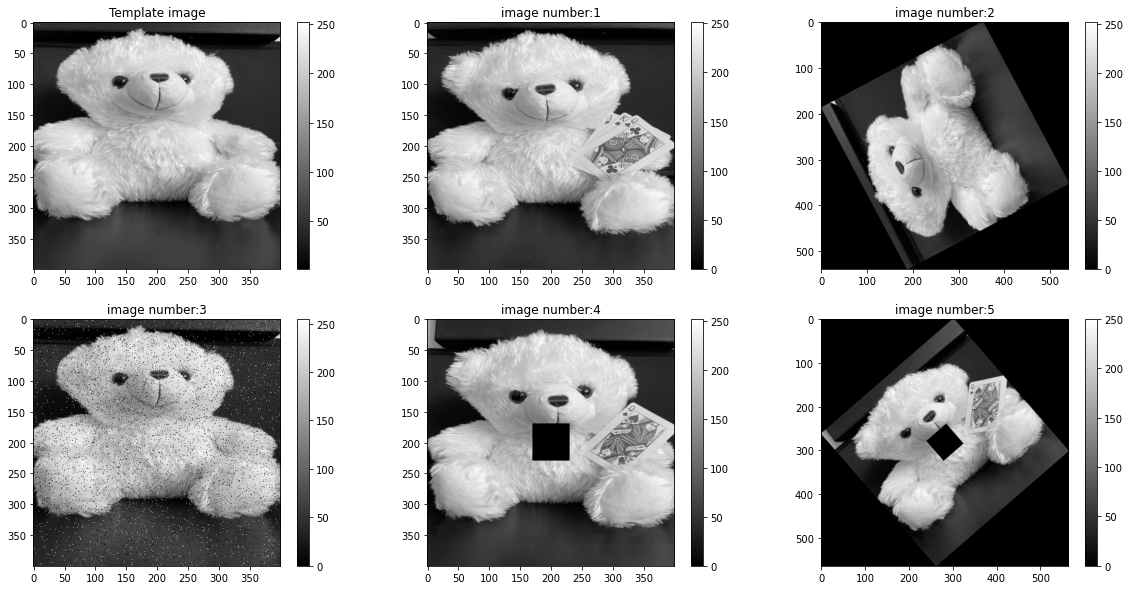

In [190]:
plotImages(variance_instances, 2, 3)


# Part 3:Pre-processing images

### Note: Part of the process has already been done:
- Rescaling images.
- Converting images to grey scale.

### Continue pre-processing:

1. Analyze an image using Histogram - Histogram is considered as a graph or plot which is related to frequency of pixels in a gray scale Image.


2. Use median filter to reduce salt and pepper noise.




Text(0.5, 1.0, 'Template_image_histogram')

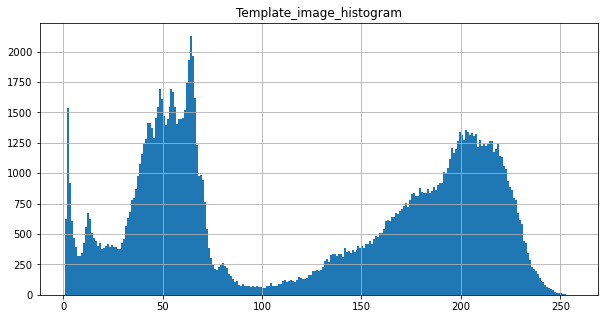

In [142]:
# Create figure
plt.figure(figsize=(10,5))

# Create histogram for template image
hist_template = template_img.copy()
plt.hist(hist_template.flatten(),255,[1,256])
plt.grid()
plt.title("Template_image_histogram")


(-0.5, 799.5, 399.5, -0.5)

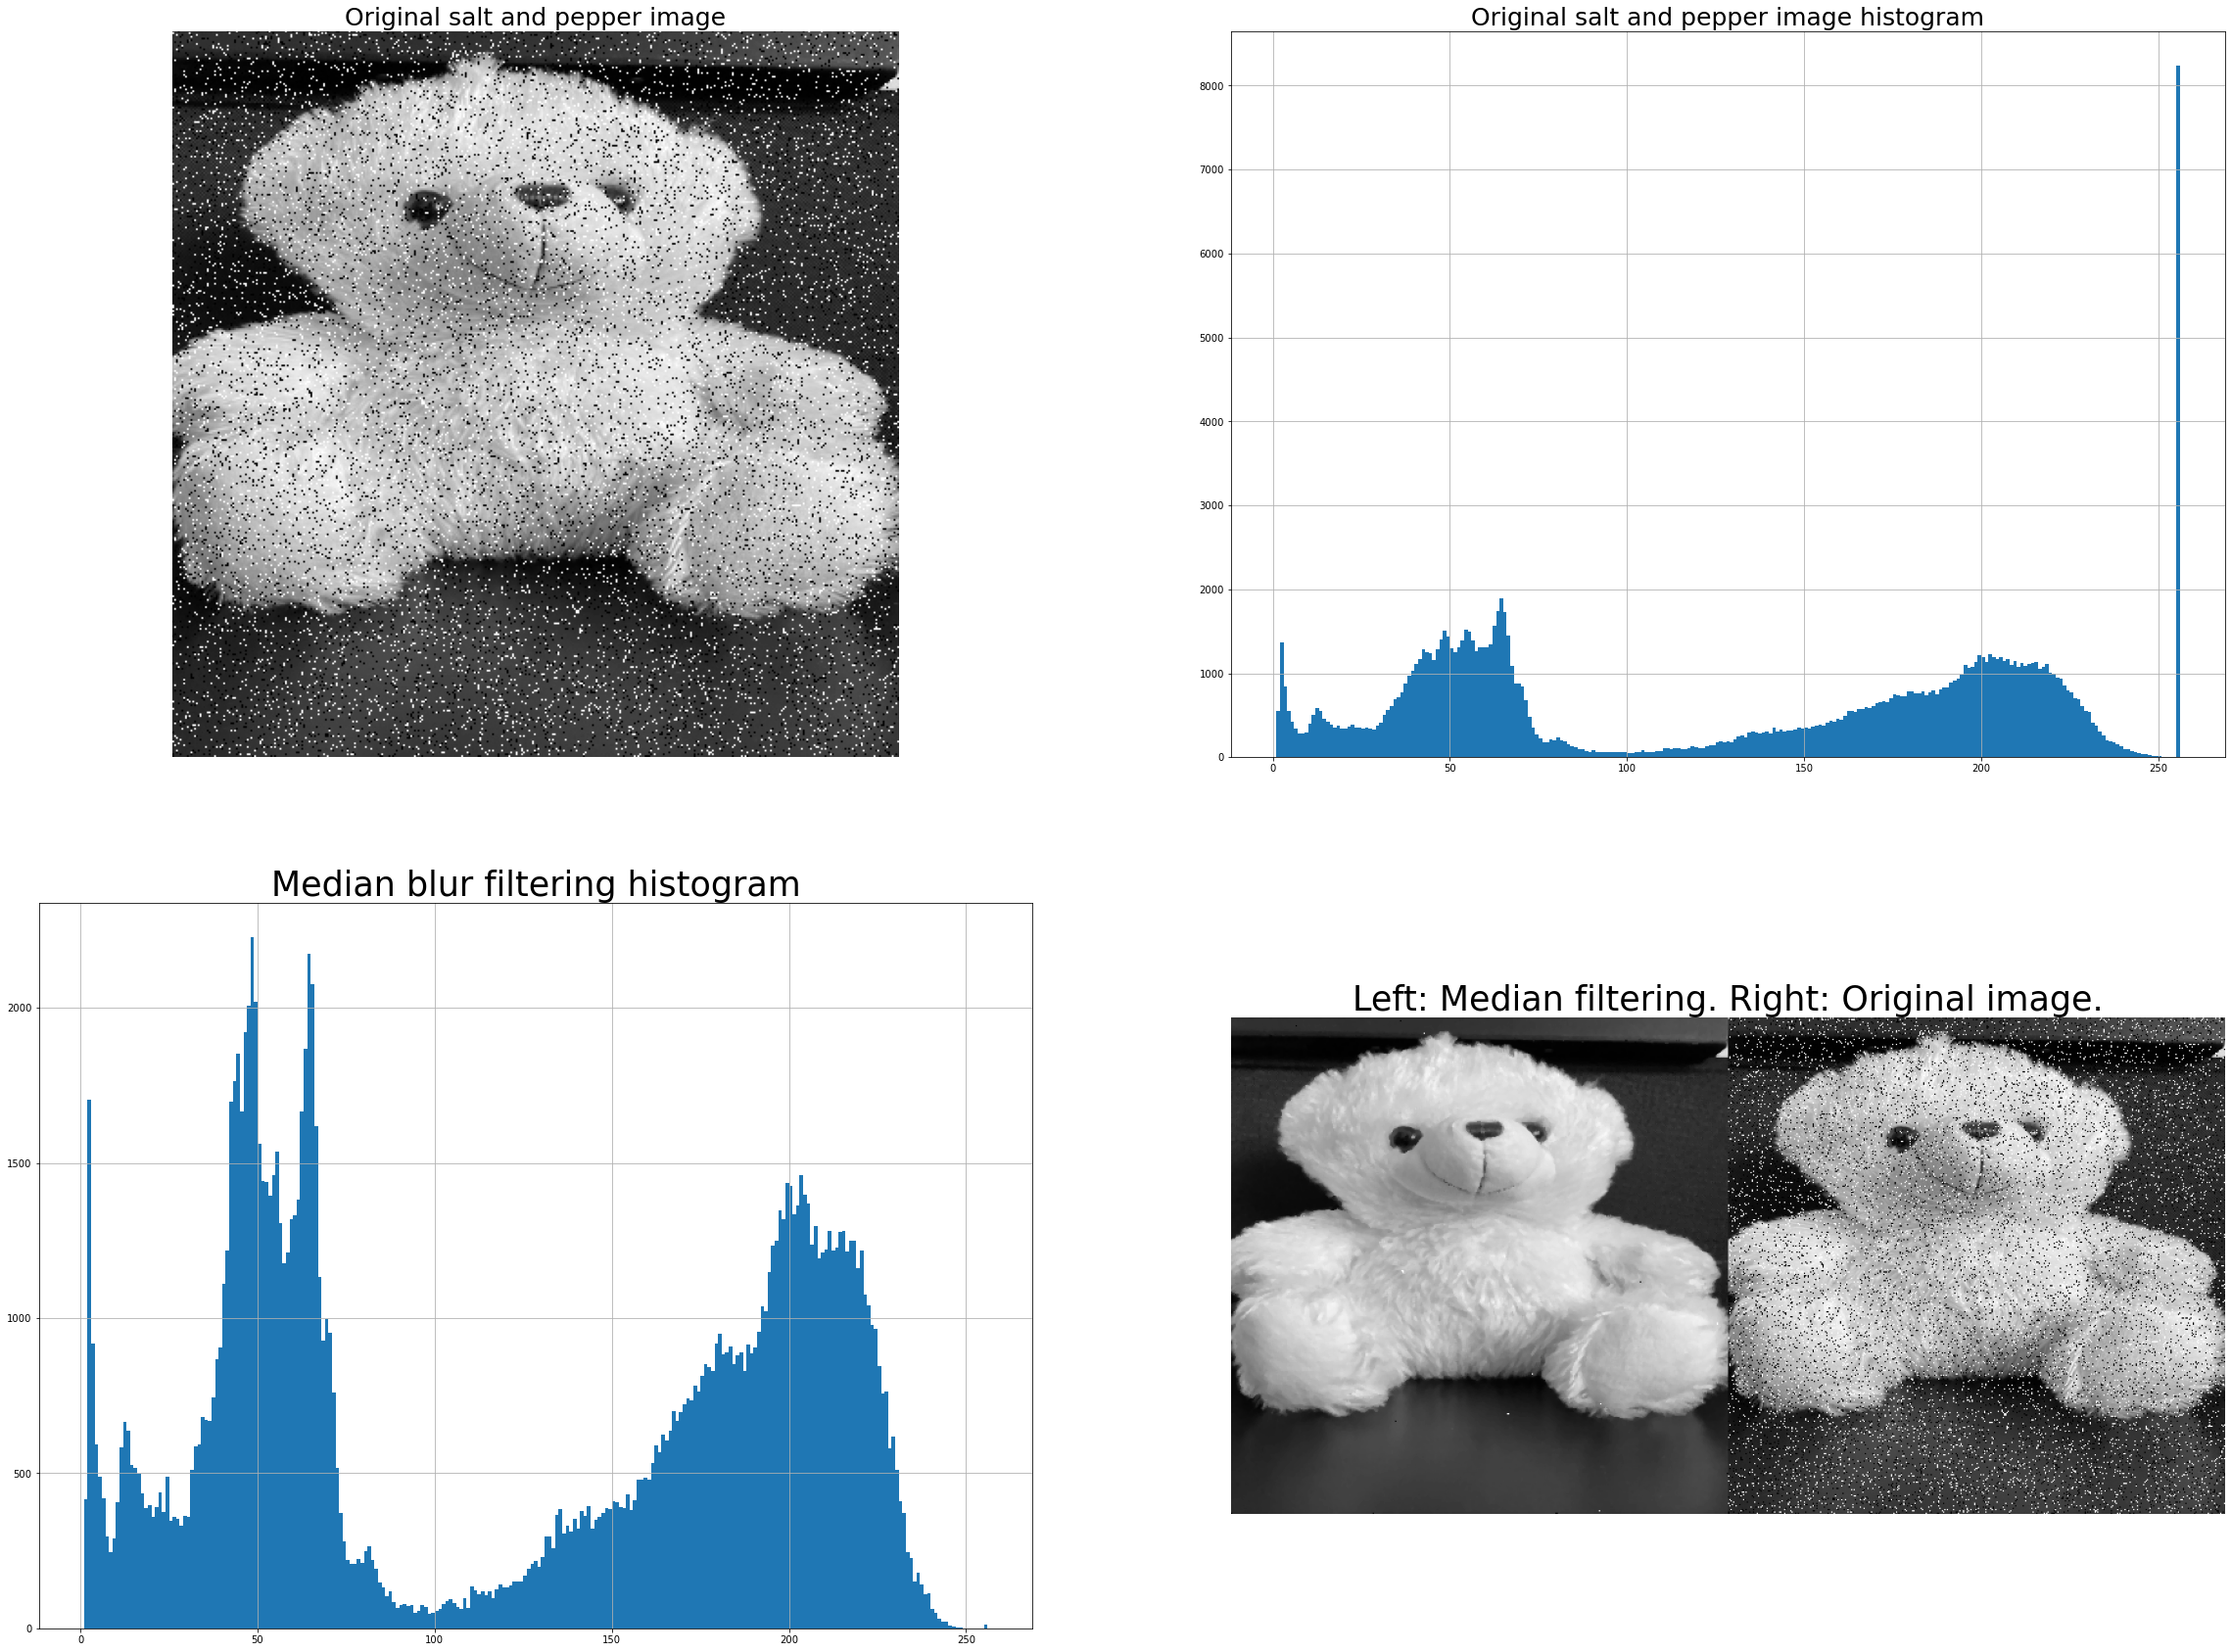

In [143]:
# Salt and pepper image analysis
fig = plt.figure(figsize=(40,30))

# Plot image of 'Salt and Pepper' noise
fig.add_subplot(2, 2, 1)
plt.imshow(variance_instances[3].copy())
plt.title("Original salt and pepper image" ,fontsize=25)
plt.axis('off')

# Plot hitogram of 'Salt and Pepper' noise
fig.add_subplot(2, 2, 2)
plt.hist((variance_instances[3].copy()).flatten(),255,[1,256])
plt.title("Original salt and pepper image histogram" ,fontsize=25)
plt.grid()


# Plot hitogram of correction to'Salt and Pepper' noise using median filtering
fig.add_subplot(2, 2, 3)
median_filter_img = cv2.medianBlur(variance_instances[3].copy(), 3)
plt.hist(median_filter_img.flatten(),255,[1,256])
plt.title("Median blur filtering histogram",  fontsize=35)
plt.grid()

# Plot the 2 images before and after filtering
fig.add_subplot(2, 2, 4)
compare = np.concatenate((median_filter_img,variance_instances[3].copy()), axis=1) #side by side comparison
plt.imshow(compare)
plt.title("Left: Median filtering. Right: Original image.",  fontsize=35)
plt.axis('off')



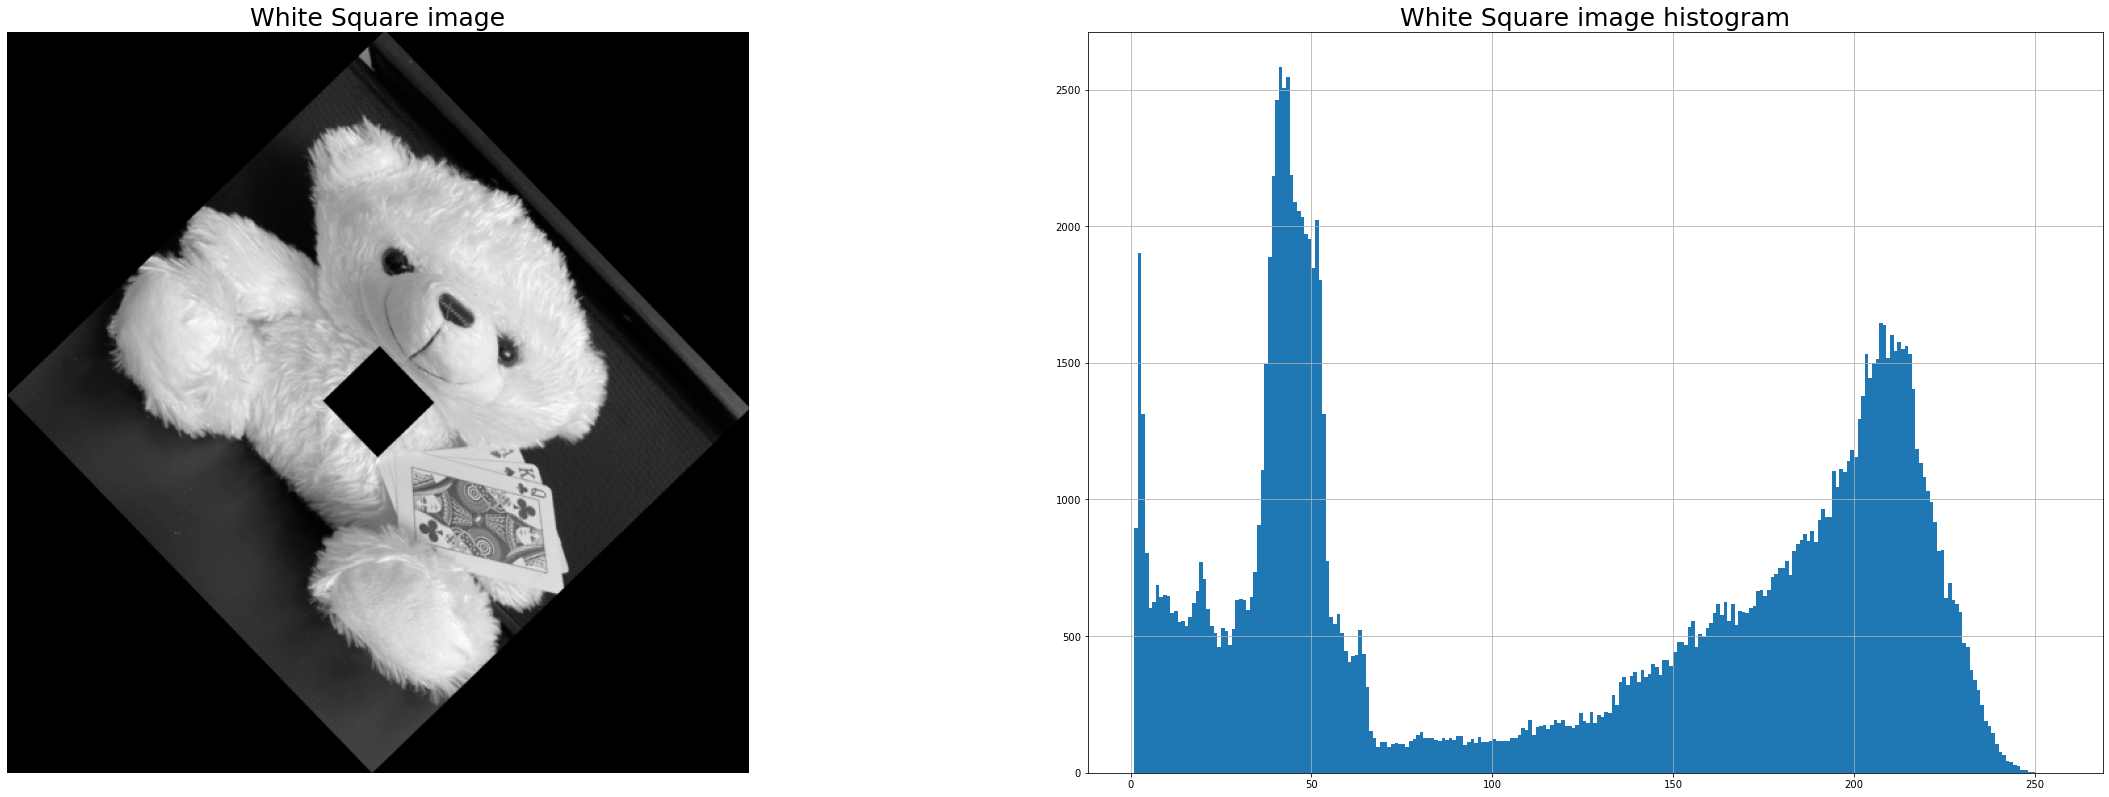

In [144]:
# White Square image analysis
fig = plt.figure(figsize=(40,30))

# Plot image of White Square
fig.add_subplot(2, 2, 1)
plt.imshow(variance_instances[5].copy())
plt.title("White Square image",  fontsize=25)
plt.axis('off')

# Plot hitogram of 'Salt and Pepper' noise
fig.add_subplot(2, 2, 2)
plt.hist((variance_instances[5].copy()).flatten(),255,[1,256])
plt.title("White Square image histogram",  fontsize=25)
plt.grid()


# Part 4:Registration images

1.	Detect feature
2.	Match corresponding feature
3.	Infer geometric transformation
4.	Use the geometric transformation to align one image to another


In [145]:
def ImageRegistration(source, template):
    
    """
    Two images are passed as a parameters. 
    The function returns an aligned image to the template
    """
    # create figure
    fig = plt.figure(figsize=(30,20)) 
    
    src_img = source
    reference_img = template
    
    max_fetures = 500
    good_match_percent = 0.5

    # Initiate SIFT detector
    # max_fetures = The number of best features to retain. 
    # The features are ranked by their scores (measured in SIFT algorithm as the local contrast)
    sift = cv2.SIFT_create(max_fetures)

    # find the keypoints and descriptors with SIFT
    kp1, desc1 = sift.detectAndCompute(src_img, mask=None)
    kp2, desc2 = sift.detectAndCompute(reference_img, mask=None)
#     plt.subplot(121)
#     plt.imshow(desc1[:100],cmap='hot') # plot 100 rows
#     plt.title("Left: descriptors of source image.",  fontsize=25)
#     plt.axis('off')

#     plt.subplot(122)
#     plt.imshow(desc2[:100], cmap='Blues')
#     plt.title("Right: descriptors of template image.",  fontsize=25)
#     plt.axis('off')
 
    # create BFMatcher object (brute-force)
    bf = cv2.BFMatcher(crossCheck=True)

    # Match descriptors.
    matches = bf.match(desc1,desc2)
    matches = sorted(matches, key = lambda x:x.distance)
    
    # Remove not so good matches
    num_good_matches = int(len(matches) * good_match_percent)
    matches = matches[:num_good_matches]
    
    # Draw top matches
    im_matches = cv2.drawMatches(src_img, kp1, reference_img, kp2, matches, None)
    
    # Adds a subplot and show the matches
    plt.imshow(im_matches)
    plt.title("imMatches",  fontsize=25)
    plt.axis('off')

    plt.show()
    
    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = kp1[match.queryIdx].pt
        points2[i, :] = kp2[match.trainIdx].pt
        
    # Find homography
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
    
    # Use homography to wrap the source image to destination. 
    # hight and width are the size of destination image (reference_img).
    height, width = reference_img.shape
    im1Reg = cv2.warpPerspective(src_img, h, (width, height))

    return(im1Reg)

In [146]:
def edgeDetection(image, algorithm = 'thresh'):
    
    """
    image, string are passed as a parameters. 
    The function returns filterd image according to the method choosen (thresh/Canny).
    """
    # Plot image process:
    plt.figure(figsize=(18,8))
    plt.subplot(1,4,1)
    plt.imshow(image)
    plt.title('Original image') 

    # load the image, convert it to grayscale, and blur it slightly
    img = image.copy()

    # USE Canny algorithm to get bold lines
    if (algorithm == 'Canny'):
        
        # Smooth image with a Gaussian filter
        img = cv2.GaussianBlur(image, (5, 5), 0)
        edge =  cv2.Canny(img,400,0)
        
        #Plot Canny 
        plt.subplot(1,4,2)
        plt.imshow(edge)
        plt.title('Canny algorithm') 
        
    else:
        
        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        edge = cv2.adaptiveThreshold(img,250, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,-30)
        # Plot thresholding 
        plt.subplot(1,4,2)
        plt.imshow(edge)
        plt.title('thresh') 

        edge = cv2.erode(edge, None, iterations=2)
        # Plot erode 
        plt.subplot(1,4,3)
        plt.imshow(edge)
        plt.title('erode') 

        edge = cv2.dilate(edge, None, iterations=2)
        # Plot dilate 
        plt.subplot(1,4,4)
        plt.imshow(edge)
        plt.title('dilate') 
        
    
    return(edge)


In [170]:
def CardVisualInspectionSystem(image1, image2, algorithm = 'thresh'):
    
    """
    Two images, string are passed as a parameters.
    The function check if image1 and image2 has the exact same object.
    The function returns aligned image to image2 and substruction of aligned image and template.
    """
    # Plot image process:
    plt.figure(figsize=(20,30))
    
    # Use copy of the images
    img1 = image1.copy()
    img2 = image2.copy()

    # Perform registration
    align_image = ImageRegistration(img1, img2)
    
    plt.imshow(align_image)
    plt.subplot(121)
    plt.imshow(img2)
    plt.title('Original image',  fontsize=25) 

    plt.subplot(122)
    plt.imshow(img1)
    plt.title('Image to be aligned',  fontsize=25) 

    # Detect the edges of the images
    align_image_edge = edgeDetection(align_image, algorithm)
    img2_edge = edgeDetection(img2, algorithm)
    
    # Subtraction of images
    test = cv2.subtract(align_image_edge, img2_edge)

    # Check whether the zero matrix was obtained
    if (not np.any(test)):
        print("The images are perfectly the same")
    else:
        print("The images are NOT perfectly the same")
        
        if(np.count_nonzero(test)>1731 ): # Define threshold
            print("There are {} non-zero pixels".format(np.count_nonzero(test)))
            print("DEFECT IMAGE")
        else:
            print("There are {} non-zero pixels".format(np.count_nonzero(test)))
            print("SELL ITEM")
    

    return(test, align_image)

<Figure size 1440x2160 with 0 Axes>

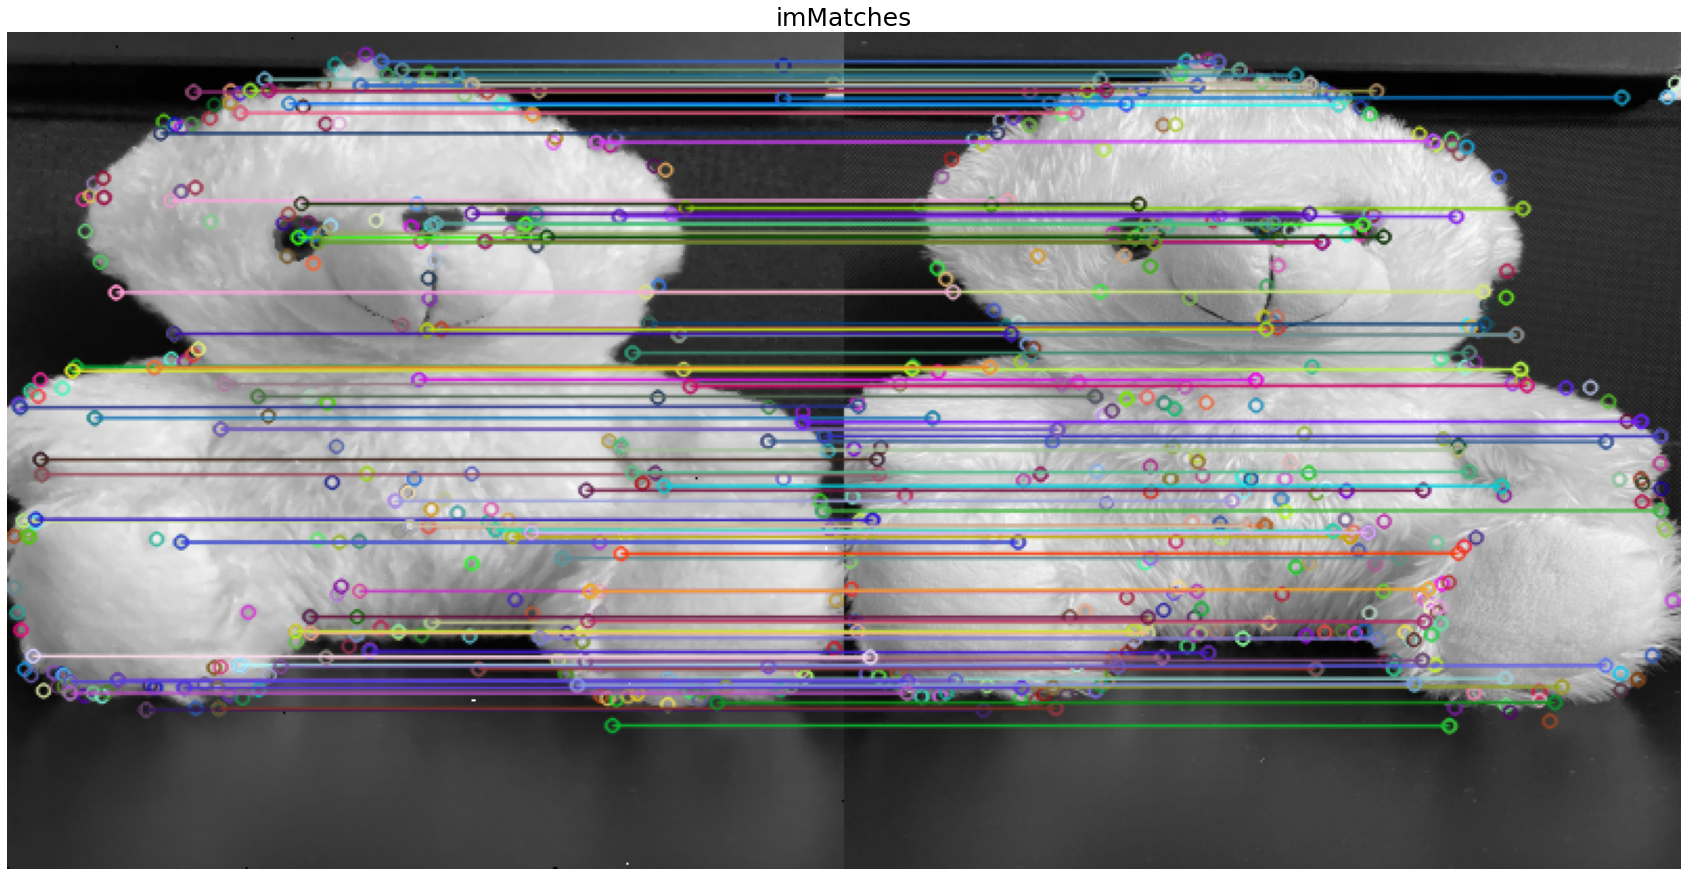

The images are NOT perfectly the same
There are 458 non-zero pixels
SELL ITEM


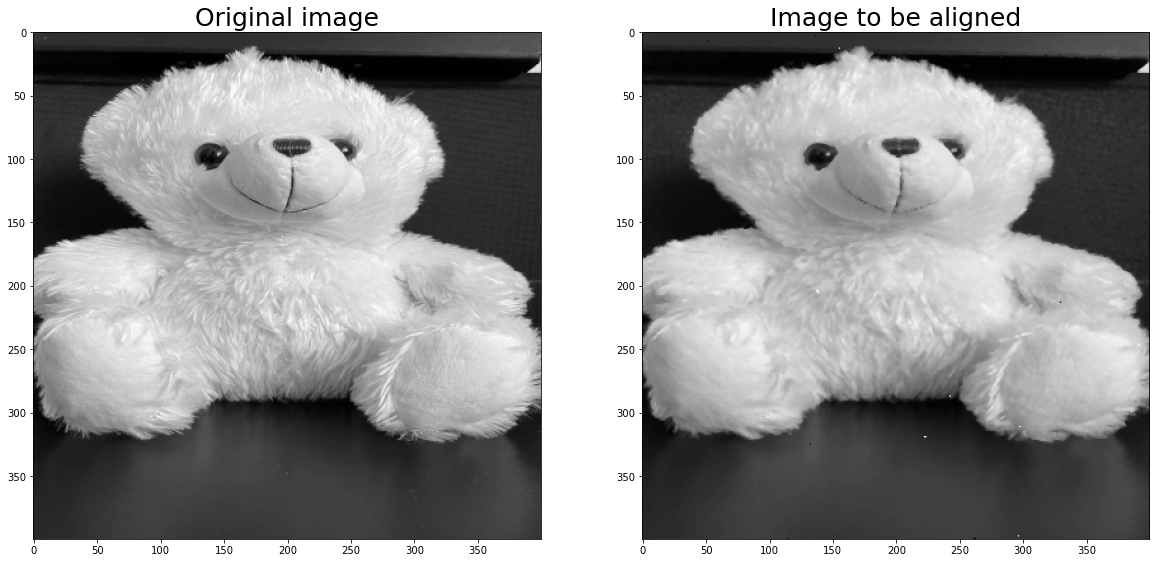

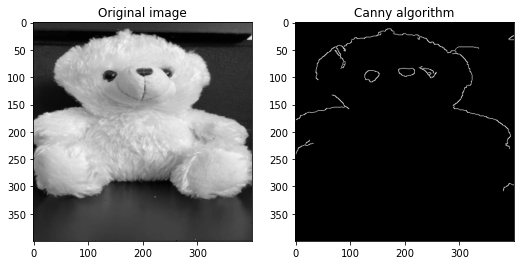

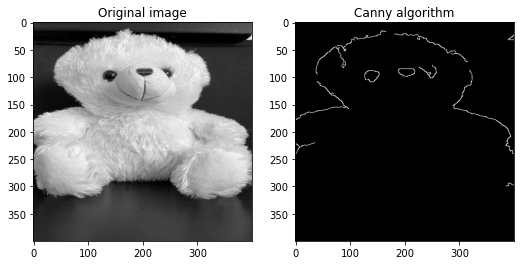

In [176]:
test_image, align_image = CardVisualInspectionSystem(median_filter_img, variance_instances[0],'Canny')

Text(0.5, 1.0, 'Subtraction of images')

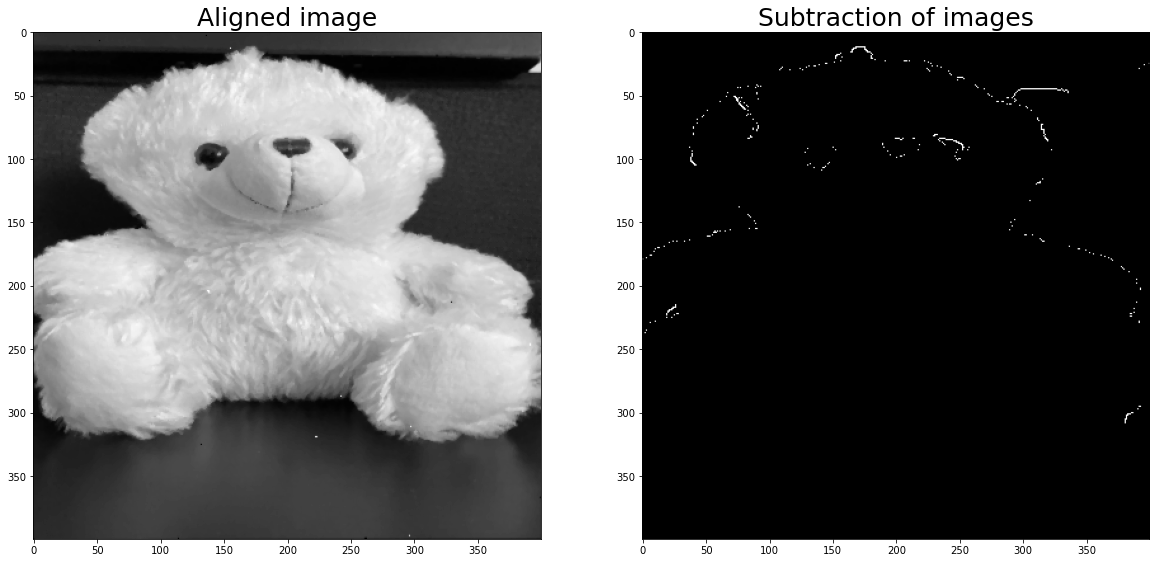

In [177]:
plt.subplot(121)
plt.imshow(align_image)
plt.title('Aligned image',  fontsize=25)

plt.subplot(122)
plt.imshow(test_image)
plt.title('Subtraction of images',  fontsize=25)

<Figure size 1440x2160 with 0 Axes>

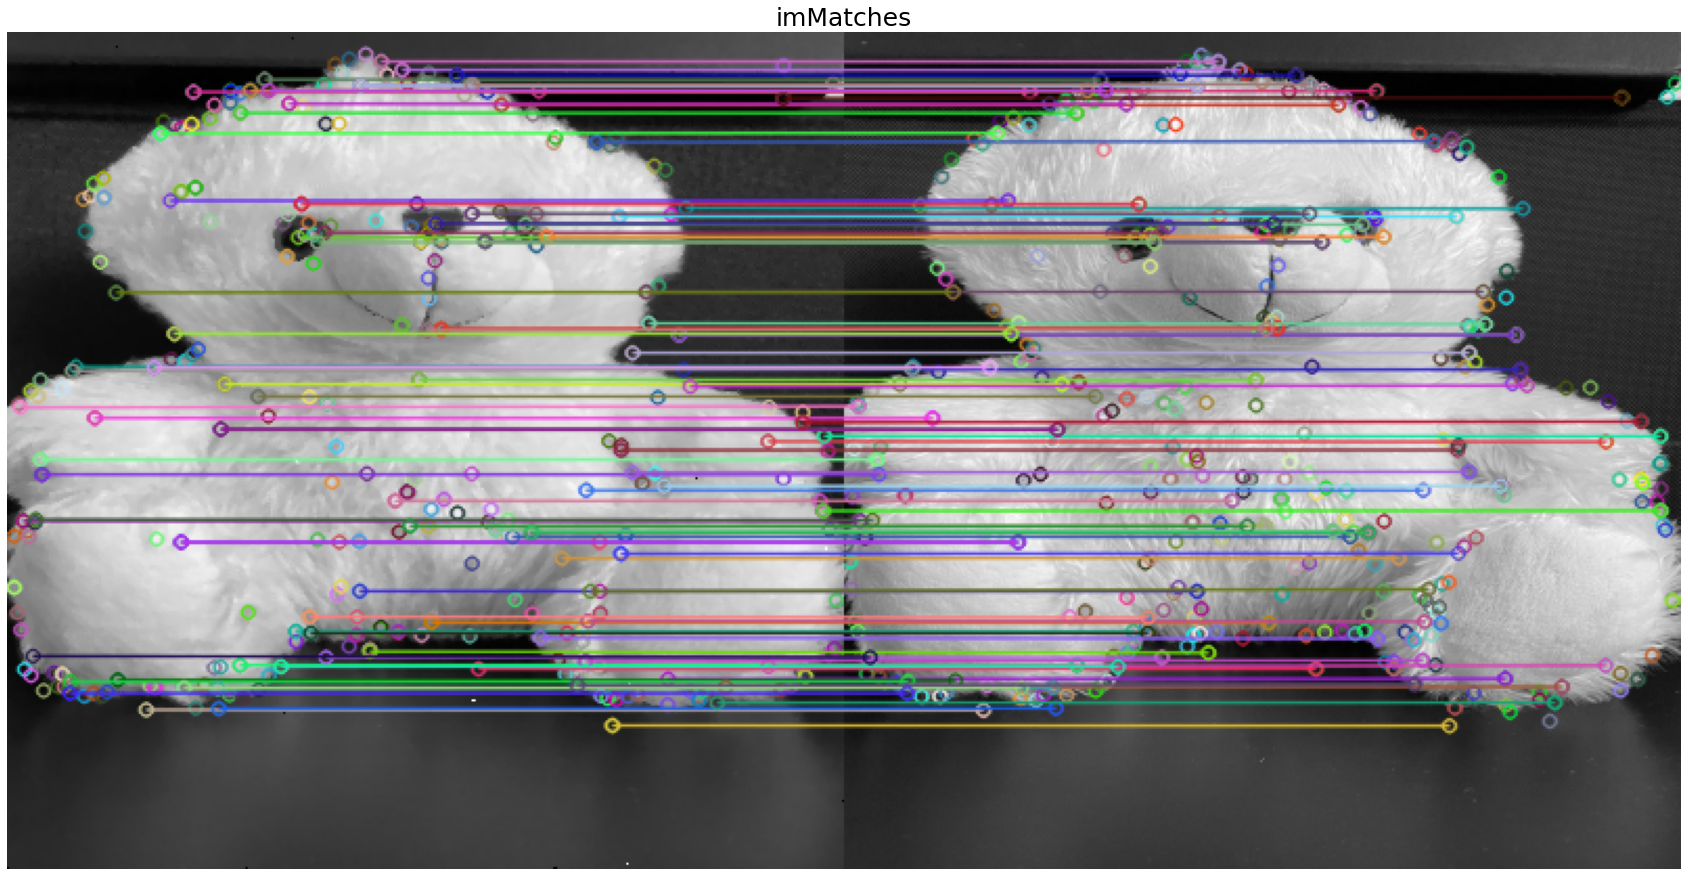

The images are NOT perfectly the same
There are 1026 non-zero pixels
SELL ITEM


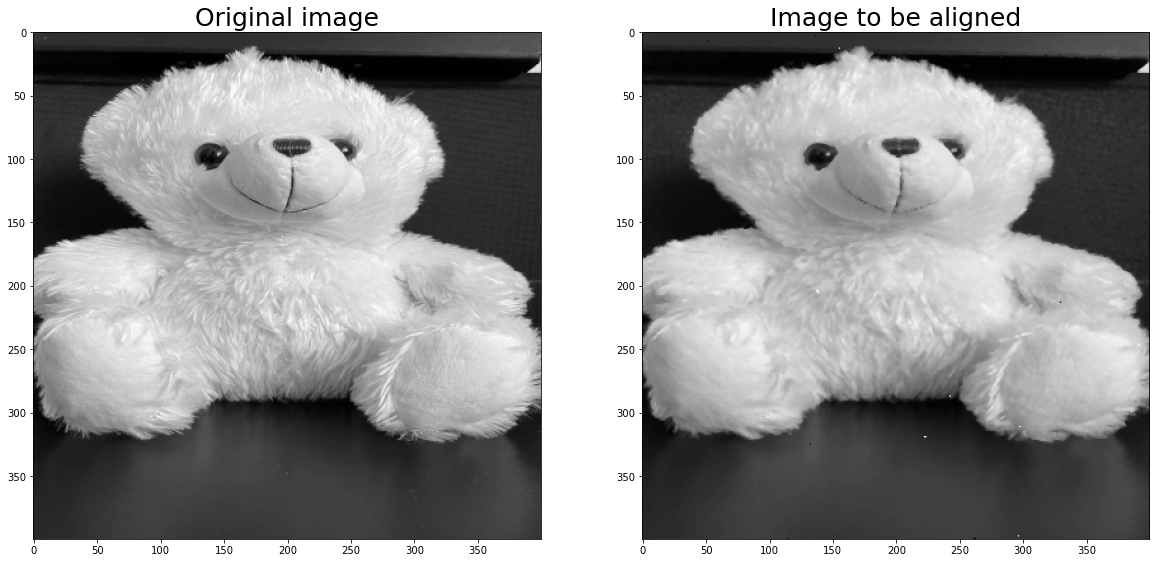

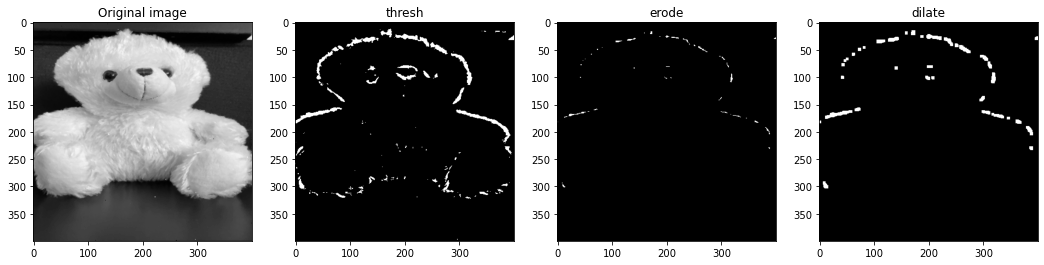

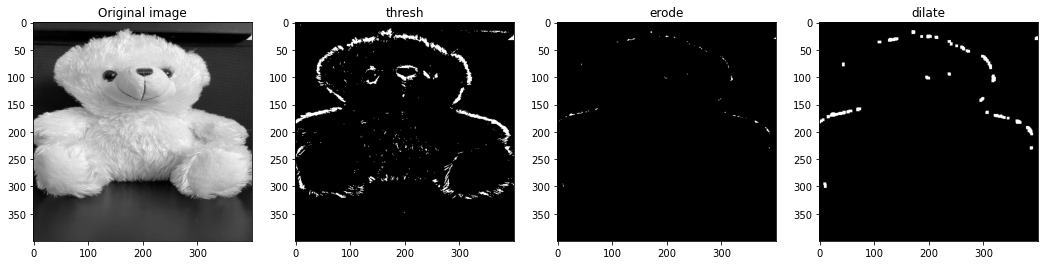

In [178]:
test_image, align_image = CardVisualInspectionSystem(median_filter_img, variance_instances[0])

Text(0.5, 1.0, 'Subtraction of images')

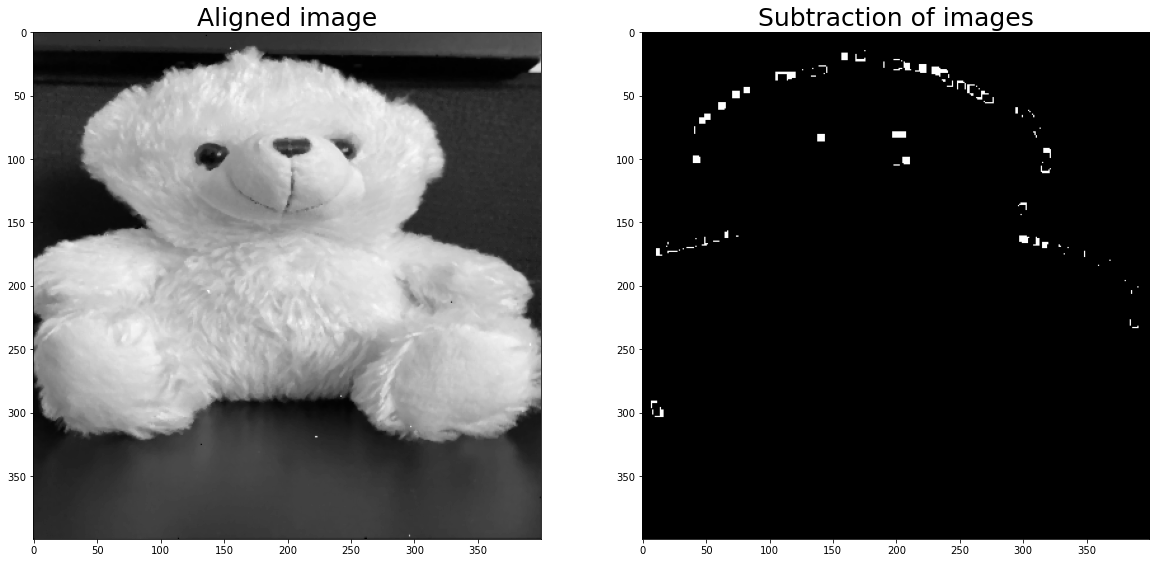

In [179]:
plt.subplot(121)
plt.imshow(align_image)
plt.title('Aligned image',  fontsize=25)

plt.subplot(122)
plt.imshow(test_image)
plt.title('Subtraction of images',  fontsize=25)
